<a href="https://colab.research.google.com/github/my612/Quantamania/blob/main/PuLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
# Install PuLP
!pip install pulp

In [38]:
from pulp import *
def create_model(dists):
    """MTZ formulation for TSP"""
    n = len(dists)
    tsp = LpProblem("TSP", LpMinimize)
    x = LpVariable.dicts('x', [(i, j) for i in range(n) for j in range(n)], cat=LpBinary)
    t = LpVariable.dicts('t', range(n), 1, n, LpContinuous)

    tsp += lpSum(dists[i][j] * x[(i, j)] for i in range(n) for j in range(n))

    for i in range(n):
        tsp += x[(i, i)] == 0 # no loops
        tsp += lpSum(x[(i, j)] for j in range(n)) == 1 # outdegree == 1
        tsp += lpSum(x[(j, i)] for j in range(n)) == 1 # indegree == 1

    for i in range(n):
        for j in range(n):
            if i != j and i != 0 and j != 0:
                tsp += t[j] >= t[i]+1 - (2*n) * (1 - x[(i, j)]) # the 2n coefficient is arbitrary

    return tsp, x, t

In [32]:
import math
from random import randrange

def distance(a, b):
    return math.sqrt((a[0] - b[0])**2 + (a[1] - b[1])**2)

def generate_data(n):
    coords = [(randrange(100), randrange(100)) for _ in range(n)]
    dists = [[0] * n for _ in range(n)]
    for i in range(n):
        for j in range(i + 1, n):
            dists[i][j] = dists[j][i] = distance(coords[i], coords[j])
    return dists, coords

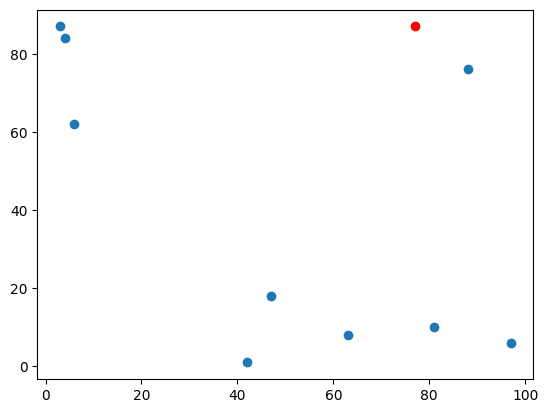

In [43]:
import matplotlib.pyplot as plt
n = 10
dists, coords = generate_data(n)
plt.plot(coords[0][0], coords[0][1], 'ro')
plt.plot([p[0] for p in coords[1:]], [p[1] for p in coords[1:]], 'o')
plt.show()

Optimal 319.9862301966355
[(0, 9), (1, 8), (2, 0), (3, 7), (4, 2), (5, 6), (6, 1), (7, 4), (8, 3), (9, 5)]


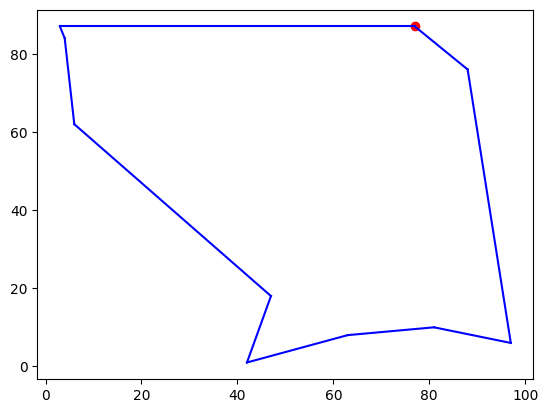

In [60]:
# solve the model
model, x, _ = create_model(dists)
status = model.solve()
print(LpStatus[status], pulp.value(model.objective))
route = [(i, j) for i in range(n) for j in range(n) if pulp.value(x[(i, j)]) == 1]
print(route)

plt.plot(coords[0][0], coords[0][1], 'ro')
for u, v in route:
    plt.plot([coords[u][0], coords[v][0]], [coords[u][1], coords[v][1]], 'b')

In [62]:
from itertools import pairwise, permutations
def brute_force(dists):
    n = len(dists)
    min_dist = math.inf
    min_route = None
    for route in permutations(range(1, n)):
        dist = 0
        u = 0
        for v in route:
            dist += dists[u][v]
            u = v
        dist += dists[u][0]
        if dist < min_dist:
            min_dist = dist
            min_route = route
    return min_dist, list(pairwise([0] + list(min_route) + [0]))

319.9862301966356
[(0, 2), (2, 4), (4, 7), (7, 3), (3, 8), (8, 1), (1, 6), (6, 5), (5, 9), (9, 0)]


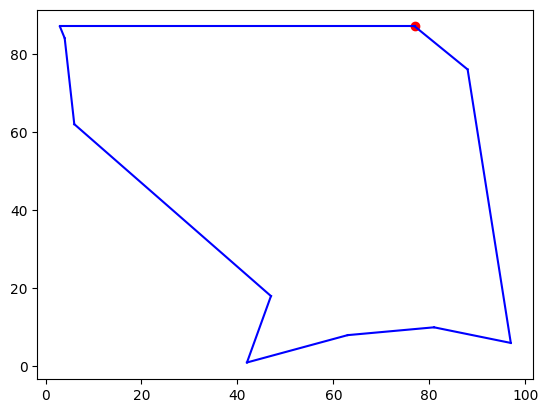

In [63]:
from itertools import pairwise
# solve using brute force
dist, route = brute_force(dists)
print(dist)
print(route)

plt.plot(coords[0][0], coords[0][1], 'ro')
for u, v in route:
    plt.plot([coords[u][0], coords[v][0]], [coords[u][1], coords[v][1]], 'b')